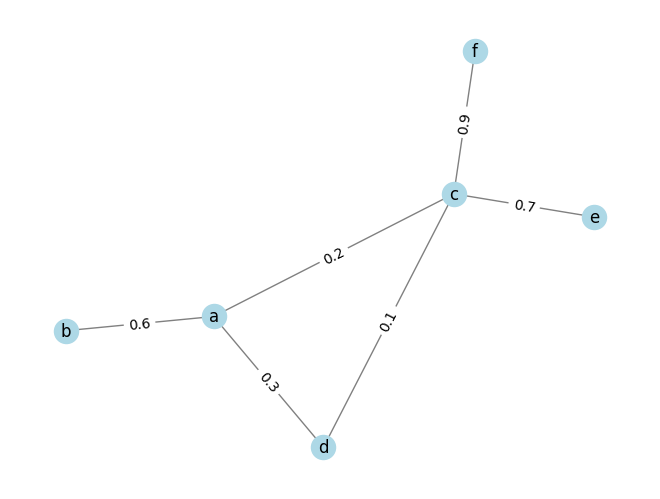

In [8]:
#使用networkx绘制图

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

# 绘制图形
pos = nx.spring_layout(G)  # 定义一个布局，用于节点的位置
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# 绘制边的权重
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [12]:
#最短路径算法dijsktra和bellman-ford
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)
G.add_edge('b', 'd', weight=0.1)
G.add_edge('d', 'e', weight=0.7)
G.add_edge('e', 'f', weight=0.9)
G.add_edge('b', 'f', weight=0.3)

G['a']['b']['weight']


0.6

In [14]:
def dijsktra(G, start):
    dis=[]
    for i in G.nodes():
        dis.append(nx.dijkstra_path_length(G,start,i))
    return dis

def bellman_ford(G, start):
    dis=[]
    for i in G.nodes():
        dis.append(nx.bellman_ford_path_length(G,start,i))
    return dis

dis_dij=dijsktra(G,'a')
dis_bel=bellman_ford(G,'a')



In [15]:
dis_bel,dis_dij
#bellman_ford算法可以计算负权重的最短路径，而dijsktra算法不能计算负权重的最短路径

([0, 0.6, 0.2, 0.3, 0.8999999999999999, 1.1],
 [0, 0.6, 0.2, 0.3, 0.8999999999999999, 1.1])

In [17]:
#将最短路径标记出来
#这里演示一下从a到d的最短路径
#先找到最短路径
dis=dijsktra(G,'a')
dis

[0, 0.6, 0.2, 0.3, 0.8999999999999999, 1.1]

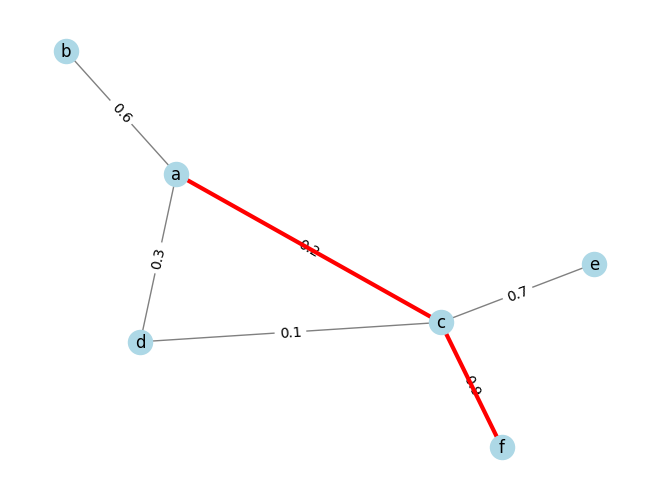

In [19]:
#在图中标记出来
pos = nx.spring_layout(G)  # 定义一个布局，用于节点的位置
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
# 绘制边的权重
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
#标记最短路径
path=nx.dijkstra_path(G,'a','f')#最短路径,返回的是一个列表
path_edges=list(zip(path,path[1:]))#将列表中的相邻元素组成元组,list(zip([1,2,3],[2,3,4]))=[(1,2),(2,3),(3,4)]

nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='red',width=3)
plt.show()

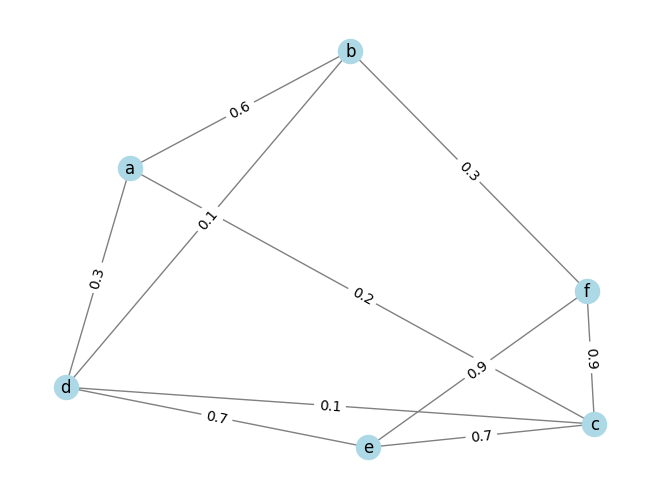

In [21]:
#最小生成树
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)
G.add_edge('b', 'd', weight=0.1)
G.add_edge('d', 'e', weight=0.7)
G.add_edge('e', 'f', weight=0.9)
G.add_edge('b', 'f', weight=0.3)

# 绘制图形
pos = nx.spring_layout(G)  # 定义一个布局，用于节点的位置
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# 绘制边的权重
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

最小生成树就是找出一个总路线最短且没有重复回路的方法将所有节点放进一条路径中

In [40]:
#krual算法，更加适合稀疏图
#1.将所有的边按照权重从小到大排序
#2.从权重最小的边开始，如果这条边的两个顶点不在同一个连通分量中，则将这条边加入最小生成树中，否则不加入
#3.重复上一步，直到所有的顶点都在同一个连通分量中
#4.最后得到的就是最小生成树

#这里使用并查集来实现查找连通分量
class UnionFind:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}#初始化每个节点的父节点都是自己

    def find(self, node):
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])
        return self.parent[node]

    def union(self, node1, node2):
        root1 = self.find(node1)
        root2 = self.find(node2)
        if root1 != root2:
            self.parent[root2] = root1

def kruskal(G):
    mst = []
    edges = list(G.edges(data=True))
    edges.sort(key=lambda x: x[2]['weight'])
    uf = UnionFind(G.nodes())

    for edge in edges:
        u, v = edge[0], edge[1]
        if uf.find(u) != uf.find(v):  # 如果u和v不在同一个集合中
            uf.union(u, v)  # 合并集合
            mst.append(edge)  # 加入最小生成树

        if len(mst) == len(G.nodes()) - 1:
            break

    if len(mst) != len(G.nodes()) - 1:
        print('该图不是连通图')
    return mst


mst=kruskal(G)
mst



[('b', 'd', {'weight': 0.1}),
 ('c', 'd', {'weight': 0.1}),
 ('a', 'c', {'weight': 0.2}),
 ('b', 'f', {'weight': 0.3}),
 ('c', 'e', {'weight': 0.7})]

{('b', 'd'): Text(0.4371426288451595, -0.005863915713903545, '0.1'),
 ('b', 'f'): Text(0.8275660237554296, -0.3808093386543886, '0.3'),
 ('d', 'c'): Text(-0.13957367012227007, 0.249391320404933, '0.1'),
 ('c', 'a'): Text(-0.5753763617871758, 0.009945614014448836, '0.2'),
 ('c', 'e'): Text(-0.6109165422699836, 0.38319540500290084, '0.7')}

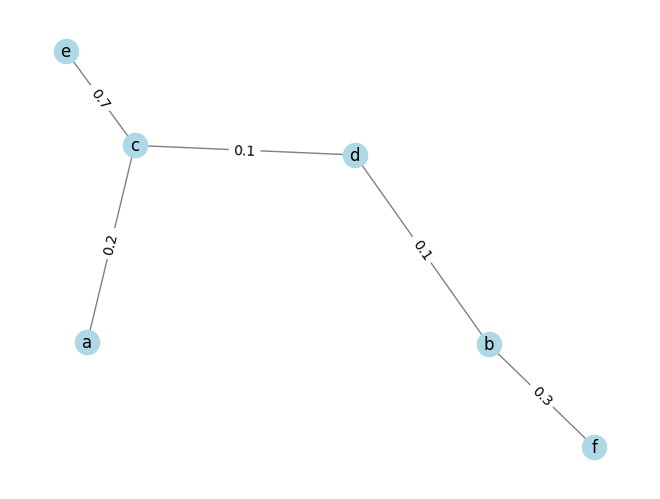

In [41]:
#根据最小生成树绘制图形
new_G=nx.Graph()
new_G.add_edges_from(mst)

pos = nx.spring_layout(new_G)  # 定义一个布局，用于节点的位置
nx.draw(new_G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# 绘制边的权重
edge_labels = nx.get_edge_attributes(new_G, 'weight')
nx.draw_networkx_edge_labels(new_G, pos, edge_labels=edge_labels)



In [67]:
#prim算法，更加适合稠密图
#1.任选一个顶点作为起始点，然后找到与其相连的最小权重的边，将这条边加入最小生成树中
#2.然后找到与这两个顶点相连的最小权重的边，将这条边加入最小生成树中
#3.重复上一步，直到所有的顶点都在最小生成树中
#4.最后得到的就是最小生成树

def prim(G):
    mst = []
    nodes = list(G.nodes())
    visited = set([nodes[0]])  # 使用集合来快速检查是否访问过

    while len(visited) != len(nodes):
        min_edge = None
        min_weight = float('inf')  # 设置一个很大的初始值

        for u in visited:
            for v in G.neighbors(u):
                if v not in visited and G[u][v]['weight'] < min_weight:
                    min_weight = G[u][v]['weight']
                    min_edge = [u, v, {'weight':G[u][v]['weight']}]

        if min_edge is not None:
            mst.append(min_edge)
            visited.add(min_edge[1])  # 添加新顶点到访问过的集合中

    return mst

# 假设G是已经创建好的图
mst = prim(G)
mst


[['a', 'c', {'weight': 0.2}],
 ['c', 'd', {'weight': 0.1}],
 ['d', 'b', {'weight': 0.1}],
 ['b', 'f', {'weight': 0.3}],
 ['d', 'e', {'weight': 0.7}]]

{('a', 'c'): Text(0.543190908261797, -0.7072763517949949, '0.2'),
 ('c', 'd'): Text(0.3410593103383047, -0.11754954198970356, '0.1'),
 ('d', 'b'): Text(-0.212639557764232, 0.2525327107425895, '0.1'),
 ('d', 'e'): Text(0.2563292151372145, 0.37285595462364046, '0.7'),
 ('b', 'f'): Text(-0.7995201233990116, 0.33442039717135447, '0.3')}

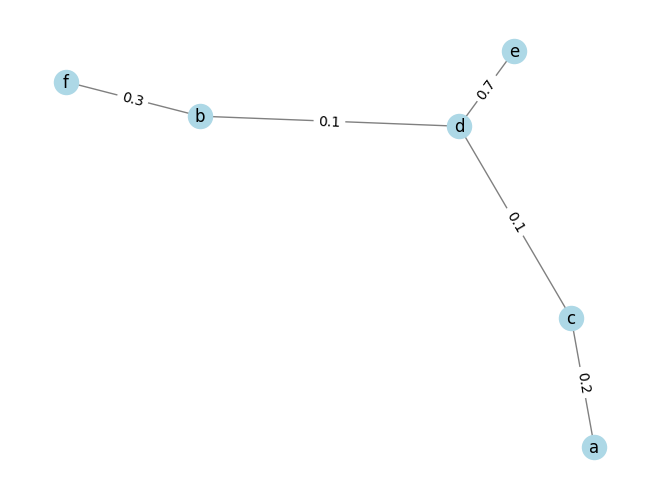

In [68]:
#根据最小生成树绘制图形
new_G=nx.Graph()
new_G.add_edges_from(mst)

pos = nx.spring_layout(new_G)  # 定义一个布局，用于节点的位置
nx.draw(new_G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# 绘制边的权重
edge_labels = nx.get_edge_attributes(new_G, 'weight')
nx.draw_networkx_edge_labels(new_G, pos, edge_labels=edge_labels)

In [69]:
#对最小生成树的权重求和
sum =0
for edge in mst:
    sum+=edge[2]['weight']

sum

1.4